In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gamma

In [27]:
def read_earthquake_data(filename):
    """Read earthquake data from a text file."""
    return np.loadtxt(filename)

def create_exponential_qq_plot(data):
    """Create an exponential Q-Q plot for the given data."""
    n = len(data)
    k = np.arange(1, n + 1)
    
    # Sort the data
    sorted_data = np.sort(data)
    
    # Calculate theoretical quantiles
    theoretical_quantiles = -np.log(1 - k/(n + 1))
    
    # Create the Q-Q plot
    plt.figure(figsize=(10, 6))
    plt.plot(theoretical_quantiles, sorted_data, 'b.', label='Data points')
    
    # Add the reference line with intercept 0 and slope = mean(data)
    slope = np.mean(data)
    x_range = np.array([min(theoretical_quantiles), max(theoretical_quantiles)])
    plt.plot(x_range, slope * x_range, 'r-', label=f'Reference line (slope = {slope:.2f})')
    
    plt.title('Exponential Q-Q Plot')
    plt.xlabel('-log[1 - k/(n+1)]')
    plt.ylabel('Ordered data')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return sorted_data, theoretical_quantiles

def calculate_confidence_intervals(data):
    """Calculate exact and approximate confidence intervals."""
    n = len(data)
    total_sum = np.sum(data)
    xbar = np.mean(data)
    
    # Exact confidence interval using gamma distribution
    a = stats.gamma.ppf(0.025, n)
    b = stats.gamma.ppf(0.975, n)
    exact_ci = np.array([a, b]) / total_sum
    
    # First approximate interval using Fisher information
    approx_ci_1 = np.array([1 - 1.96/np.sqrt(n), 1 + 1.96/np.sqrt(n)]) / xbar
    
    # Second approximate interval
    approx_ci_2 = np.array([1/(1 + 1.96/np.sqrt(n)), 1/(1 - 1.96/np.sqrt(n))]) / xbar
    
    return exact_ci, approx_ci_1, approx_ci_2

def assess_exponential_fit(data, sorted_data, theoretical_quantiles):
    """Assess if the exponential model is reasonable using various methods."""
    # Calculate R-squared for the Q-Q plot
    slope = np.mean(data)
    predicted = slope * theoretical_quantiles
    r_squared = np.corrcoef(sorted_data, predicted)[0,1]**2
    
    # Perform Kolmogorov-Smirnov test
    ks_statistic, p_value = stats.kstest(data, 'expon', args=(0, np.mean(data)))
    
    return r_squared, ks_statistic, p_value


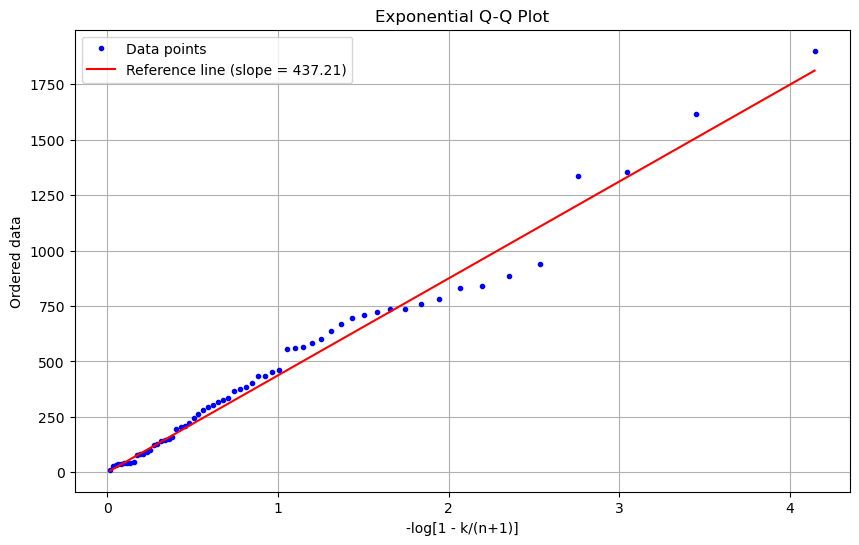


Confidence Intervals:
Exact CI: [0.001754, 0.002891]
Approx CI (Method 1): [0.001718, 0.002857]
Approx CI (Method 2): [0.001831, 0.003045]

Exponential Fit Assessment:
R-squared: 0.9831
KS-test statistic: 0.0745
KS-test p-value: 0.8562


In [28]:

# Example usage:
if __name__ == "__main__":
    # Replace with actual file path
    data = read_earthquake_data("quakes.txt")
    
    # Create Q-Q plot and get sorted data and theoretical quantiles
    sorted_data, theoretical_quantiles = create_exponential_qq_plot(data)
    
    # Calculate confidence intervals
    exact_ci, approx_ci_1, approx_ci_2 = calculate_confidence_intervals(data)
    
    # Assess exponential fit
    r_squared, ks_statistic, p_value = assess_exponential_fit(data, sorted_data, theoretical_quantiles)
    
    # Print results
    print("\nConfidence Intervals:")
    print(f"Exact CI: [{exact_ci[0]:.6f}, {exact_ci[1]:.6f}]")
    print(f"Approx CI (Method 1): [{approx_ci_1[0]:.6f}, {approx_ci_1[1]:.6f}]")
    print(f"Approx CI (Method 2): [{approx_ci_2[0]:.6f}, {approx_ci_2[1]:.6f}]")
    
    print("\nExponential Fit Assessment:")
    print(f"R-squared: {r_squared:.4f}")
    print(f"KS-test statistic: {ks_statistic:.4f}")
    print(f"KS-test p-value: {p_value:.4f}")